<a href="https://colab.research.google.com/github/rioAgustian/Numerical-Analysis/blob/main/uas_metode_numerik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ujian Akhir Semester Metode Numerik (2022)**

**Rio Agustian Gilang Fernando, 4211420004, Fisika**

**Fakultas Matematika dan Ilmu Pengetahuan Alam**

**Universitas Negeri Semarang**

## **1. Regresi Linear Berganda**

In [44]:
import numpy as np

# data
x1 = np.array([0, 1, 2, 0, 1, 2])
x2 = np.array([2, 2, 4, 4, 6, 6])
y  = np.array([19, 12, 11, 24, 22, 15])

n = len(y)
sx1 = sum(x1)
sx2 = sum(x2)
sy  = sum(y) 
sx1_sqr = sum(x1**2)
sx2_sqr = sum(x2**2)
sy_sqr  = sum(y**2)
sx1y = sum(x1*y)
sx2y = sum(x2*y)
sx1x2 = sum(x1*x2)

# matriks berikut dibuat untuk, mentukan nilai a0, a1, dan a2
A = [[n,   sx1,     sx2  ],
     [sx1, sx1_sqr, sx1x2],
     [sx2, sx1x2, sx2_sqr]]
B = [sy, sx1y, sx2y]

M  = [[n,  sx1,     sx2    ],
     [sx1, sx1_sqr, sx1x2  ],
     [sx2, sx1x2,   sx2_sqr]]
M1 = [[sy,   sx1,     sx2 ],
     [sx1y, sx1_sqr, sx1x2],
     [sx2y, sx1x2, sx2_sqr]]
M2 = [[n,   sy,  sx2    ],
     [sx1, sx1y, sx1x2  ],
     [sx2, sx2y, sx2_sqr]]
M3 = [[n,   sx1,    sy  ],
     [sx1, sx1_sqr, sx1y],
     [sx2, sx1x2,   sx2y]]

# nilai a0, a1, dan a2
a0 = np.linalg.det(M1)/np.linalg.det(M)
a1 = np.linalg.det(M2)/np.linalg.det(M)
a2 = np.linalg.det(M3)/np.linalg.det(M)

# koefisien korelasi
r = np.sqrt(
    ((a1*sx1y) + (a2*sx2y)) / sy_sqr
)

# galat standar taksiran
s = np.sqrt(
    (sy_sqr - a0*sy - a1*sx1y - sx2y) / (n - 3)
    )

# hasil 
# maksud "4" di samping f adalah banyaknya digit di belakang koma
a = "Persamaan: \ny = {0:0.4f} + {1:0.4f}x1 + {2:0.4f}x2".format(a0,a1,a2)
b = "\n\nKoefisien korelasi: \nr = {0:0.4f}".format(r)
c = "\n\nGalat standar taksiran: \nSr = {0:0.4f}".format(s)
print(a + b + c)

Persamaan: 
y = 14.1667 + -6.6667x1 + 2.4167x2

Koefisien korelasi: 
r = 0.4860

Galat standar taksiran: 
Sr = 14.1559


## **2. Interpolasi Polinomial Orde-3** 

In [45]:
# interpolasi yang digunakan adalah polinom Newton
def new_interp(x, y, t):

  # menentukan koefisien polinom
  n = len(y)
  koef = np.zeros([n, n])
  koef[:, 0] = y
  for j in range(1, n):
      for i in range(n-j):
          koef[i][j] = (koef[i+1][j-1] - koef[i][j-1]) / (x[i+j]-x[i])
  c = koef[0, :]

  # menghitung interpolasi di "t"
  n = len(x) - 1 
  p = c[n]
  for k in range(1, n+1):
    p = c[n-k] + (t - x[n-k]) * p
  return p

# data 
x_data = np.array([93, 96.2, 100, 104.2, 108.7])
y_data = np.array([11.38, 12.8, 14.7, 17.07, 19.91])
x_point = 97.66

# karena ingin polinomial berderajat 3, maka
# data yang digunakan adalah 4 titik
y_point = new_interp(x_data[0:-1], y_data[0:-1], x_point)

d = "Hasil interpolasi di titik x = {0:0.2f} adalah:".format(x_point)
e = "\ny = {0:0.2f}".format(y_point)
print(d + e)

Hasil interpolasi di titik x = 97.66 adalah:
y = 13.50


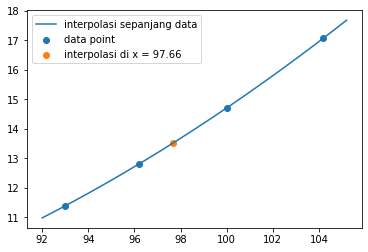

In [46]:
import matplotlib.pyplot as plt
t = np.arange(min(x_data[0:-1] -1), max(x_data[0:-1] + 1), 0.01)
y_interp = new_interp(x_data[0:-1], y_data[0:-1], t)

plt.scatter(x_data[0:-1], y_data[0:-1], label="data point")
plt.scatter(x_point, y_point, label="interpolasi di x = 97.66")
plt.plot(t, y_interp, label="interpolasi sepanjang data")
plt.legend()
plt.show()

## **3. Turunan Numerik dengan Metode Centered Infinite Difference**

In [49]:
import numpy as np

# fungsi yang ingin diturunkan
def f(x):
  a = np.where(x==0, 1, (np.exp(x)-1)/x)
  return a

x0 = 0    # start
xn = 1    # stop
h  = 0.01 # step-size
x  = np.arange(x0, xn+h, h)
y  = (f(x+h)-f(x-h))/(2*h) 
print("x \t y \t dy/dx")
for i in range(len(y)-1):
  print("{0:.2f}\t{1:.3f}\t{2:.3f}".format(x[i], f(x[i]), y[i]))

x 	 y 	 dy/dx
0.00	1.000	0.500
0.01	1.005	0.503
0.02	1.010	0.507
0.03	1.015	0.510
0.04	1.020	0.514
0.05	1.025	0.517
0.06	1.031	0.520
0.07	1.036	0.524
0.08	1.041	0.527
0.09	1.046	0.531
0.10	1.052	0.535
0.11	1.057	0.538
0.12	1.062	0.542
0.13	1.068	0.546
0.14	1.073	0.549
0.15	1.079	0.553
0.16	1.084	0.557
0.17	1.090	0.560
0.18	1.096	0.564
0.19	1.101	0.568
0.20	1.107	0.572
0.21	1.113	0.576
0.22	1.119	0.580
0.23	1.124	0.584
0.24	1.130	0.588
0.25	1.136	0.592
0.26	1.142	0.596
0.27	1.148	0.600
0.28	1.154	0.604
0.29	1.160	0.608
0.30	1.166	0.612
0.31	1.172	0.616
0.32	1.179	0.621
0.33	1.185	0.625
0.34	1.191	0.629
0.35	1.197	0.634
0.36	1.204	0.638
0.37	1.210	0.642
0.38	1.217	0.647
0.39	1.223	0.651
0.40	1.230	0.656
0.41	1.236	0.660
0.42	1.243	0.665
0.43	1.249	0.669
0.44	1.256	0.674
0.45	1.263	0.679
0.46	1.270	0.683
0.47	1.277	0.688
0.48	1.283	0.693
0.49	1.290	0.698
0.50	1.297	0.703
0.51	1.304	0.707
0.52	1.312	0.712
0.53	1.319	0.717
0.54	1.326	0.722
0.55	1.333	0.727
0.56	1.340	0.732
0.57	1.348	0.738


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


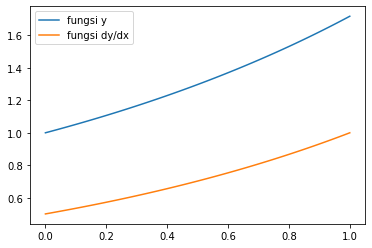

In [50]:
import matplotlib.pyplot as plt

plt.plot(x, f(x), label="fungsi y")
plt.plot(x, y, label="fungsi dy/dx")
plt.legend()
plt.show()